In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df_shoes = pd.read_csv(r'C:\Users\mengh\shopify\2019 Winter Data Science Intern Challenge Data Set.csv')

In [4]:
display(df_shoes)

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
0,1,53,746,224,2,cash,2017-03-13 12:36:56
1,2,92,925,90,1,cash,2017-03-03 17:38:52
2,3,44,861,144,1,cash,2017-03-14 4:23:56
3,4,18,935,156,1,credit_card,2017-03-26 12:43:37
4,5,18,883,156,1,credit_card,2017-03-01 4:35:11
...,...,...,...,...,...,...,...
4995,4996,73,993,330,2,debit,2017-03-30 13:47:17
4996,4997,48,789,234,2,cash,2017-03-16 20:36:16
4997,4998,56,867,351,3,cash,2017-03-19 5:42:42
4998,4999,60,825,354,2,credit_card,2017-03-16 14:51:18


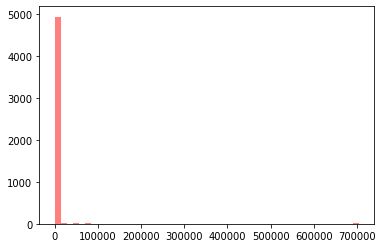

In [38]:
plt.hist(df_shoes['order_amount'], bins=50, facecolor='red', alpha=0.5)
plt.show()



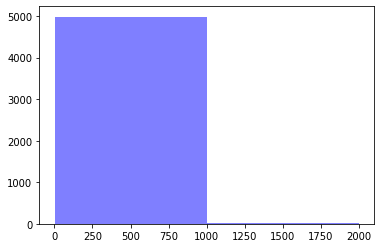

In [19]:
plt.hist(df_shoes['total_items'], bins=2, facecolor='blue', alpha=0.5)
plt.show()


In [22]:
df_shoes.groupby('total_items')['order_id'].count()

total_items
1       1830
2       1832
3        941
4        293
5         77
6          9
8          1
2000      17
Name: order_id, dtype: int64

In [24]:
df2 = df_shoes[df_shoes['total_items'] != 2000].reset_index()

In [10]:
df_shoes['order_amount'].max()

704000

In [11]:
df_shoes['order_amount'].min()

90

In [15]:
df_shoes.groupby('order_amount')

87

AOV = total revenue / number of orders

In [3]:
df_shoes['order_amount'].mean()

3145.128

In [25]:
df2['order_amount'].sum()/df2['order_id'].count()

754.0919125025085

In [6]:
piv = df_shoes.groupby('shop_id').agg({'order_amount':'sum','total_items':['mean', 'sum']}).reset_index()

In [14]:
piv['total_items']['mean'].describe()

count    100.000000
mean       8.652863
std       66.590946
min        1.731707
25%        1.912724
50%        1.981125
75%        2.076250
max      667.901961
Name: mean, dtype: float64

In [13]:
piv.sort_values(by=('total_items','mean'))

shop_id order_amount total_items       
                    sum        mean    sum
15      16        11076    1.731707     71
98      99        18330    1.740741     94
11      12        18693    1.754717     93
46      47        12180    1.787234     84
24      25        11180    1.791667     86
..     ...          ...         ...    ...
9       10        17612    2.245283    119
89      90        19758    2.265306    111
23      24        17640    2.290909    126
36      37        16330    2.395833    115
41      42     11990176  667.901961  34063

[100 rows x 4 columns]

In [15]:
piv['cost per item'] = piv['order_amount']['sum']/piv['total_items']['sum']

In [22]:
average_cost_per_item = piv['cost per item'].mean()
print(average_cost_per_item)

407.99


In [25]:
median_cost_per_item = piv['cost per item'].median()
print(median_cost_per_item)

153.0


In [23]:
average_cost_per_item_no_outlier = piv[piv['shop_id'] != 78]['cost per item'].mean()
print(average_cost_per_item_no_outlier)

152.26262626262627


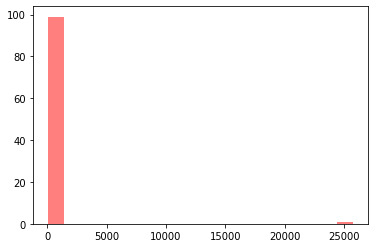

In [17]:
plt.hist(piv['cost per item'], bins=20, facecolor='red', alpha=0.5)
plt.show()

In [18]:
piv.sort_values('cost per item')

shop_id order_amount total_items        cost per item
                    sum        mean    sum              
91      92         6840    1.809524     76          90.0
1        2         9588    1.854545    102          94.0
31      32         7979    1.880952     79         101.0
99     100         8547    1.925000     77         111.0
6        7        12208    1.946429    109         112.0
..     ...          ...         ...    ...           ...
98      99        18330    1.740741     94         195.0
88      89        23128    1.934426    118         196.0
11      12        18693    1.754717     93         201.0
41      42     11990176  667.901961  34063         352.0
77      78      2263800    1.913043     88       25725.0

[100 rows x 5 columns]

Remove outlier

In [62]:
avg_aov = piv[piv['shop_id']!=78]['aov'].mean()

In [63]:
print(avg_aov)

152.26262626262627


In [35]:
df_shoes['cost per shoes'] = df_shoes['order_amount']/df_shoes['total_items']

In [36]:
df_shoes['cost per shoes'].mean()

387.7428

In [37]:
df_shoes['order_amount'].mean()

3145.128

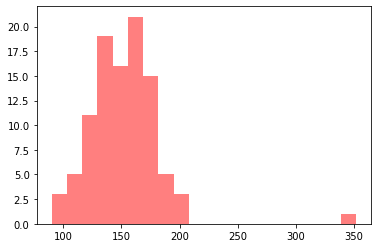

In [19]:
plt.hist(piv[(piv['shop_id']!=78)]['cost per item'], bins=20, facecolor='red', alpha=0.5)
plt.show()

In [72]:
# per shop dataframe after removing outliers
piv2 = piv[(piv['shop_id']!=78) & (piv['shop_id']!=42)].reset_index()
piv2.describe()

,index,shop_id,order_amount,total_items,aov
count,98.000000,98.000000,98.000000,98.000000,98.00000
mean,49.306122,50.306122,15016.979592,99.846939,150.22449
std,29.162329,29.162329,3469.426421,16.365259,23.91675
min,0.000000,1.000000,6840.000000,67.000000,90.00000
25%,24.250000,25.250000,12803.500000,88.000000,132.25000
50%,49.500000,50.500000,14763.000000,100.000000,153.00000
75%,73.750000,74.750000,17478.000000,111.000000,165.75000
max,99.000000,100.000000,23128.000000,136.000000,201.00000


In [60]:
display(piv)

,shop_id,order_amount,total_items,aov
91,92,6840,76,90.0
1,2,9588,102,94.0
31,32,7979,79,101.0
99,100,8547,77,111.0
6,7,12208,109,112.0
...,...,...,...,...
98,99,18330,94,195.0
88,89,23128,118,196.0
11,12,18693,93,201.0
41,42,11990176,34063,352.0


In [59]:
piv = piv.sort_values(by = 'aov')

In [61]:
df_shoes[df_shoes['shop_id']!=78]

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at,cost per shoes
160,161,78,990,25725,1,credit_card,2017-03-12 5:56:57,25725.0
490,491,78,936,51450,2,debit,2017-03-26 17:08:19,25725.0
493,494,78,983,51450,2,cash,2017-03-16 21:39:35,25725.0
511,512,78,967,51450,2,cash,2017-03-09 7:23:14,25725.0
617,618,78,760,51450,2,cash,2017-03-18 11:18:42,25725.0
691,692,78,878,154350,6,debit,2017-03-27 22:51:43,25725.0
1056,1057,78,800,25725,1,debit,2017-03-15 10:16:45,25725.0
1193,1194,78,944,25725,1,debit,2017-03-16 16:38:26,25725.0
1204,1205,78,970,25725,1,credit_card,2017-03-17 22:32:21,25725.0
1259,1260,78,775,77175,3,credit_card,2017-03-27 9:27:20,25725.0
